In [2]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.3.1-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
  Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached filelock-3.14.0-py3-none-any.whl (12 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached triton-2.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (168.1 MB)
  Using cached fsspec-2024.6.0-py3-none-any.whl (176 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
!pip install datasets
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 145.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 KB 140.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 160.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 140.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
import torch
from torch.utils.data import random_split, DataLoader, TensorDataset
import pandas as pd
from transformers import AutoTokenizer


sm_mcq_df = pd.read_csv('mc_data.csv')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
mcq_inputs = tokenizer(sm_mcq_df['question'].tolist(), return_tensors='pt', padding=True, truncation=True)

mcq_labels = torch.tensor([1 if label == 'correct' else 0 for label in sm_mcq_df['cop'].tolist()])

mcq_dataset = TensorDataset(mcq_inputs['input_ids'], mcq_inputs['attention_mask'], mcq_labels)

dataset_size = len(mcq_dataset)
val_size = int(dataset_size * 0.2)
train_size = dataset_size - val_size

mcq_train_dataset, mcq_val_dataset = random_split(mcq_dataset, [train_size, val_size])

# Print dataset sizes
print(f"Total dataset size: {dataset_size}")
print(f"Training dataset size: {train_size}")
print(f"Validation dataset size: {val_size}")

batch_size = 8
mcq_train_dataloader = DataLoader(mcq_train_dataset, batch_size=batch_size, shuffle=True)
mcq_val_dataloader = DataLoader(mcq_val_dataset, batch_size=batch_size, shuffle=False)

# Function to inspect DataLoader
def inspect_dataloader(dataloader, name):
    print(f"\n{name} DataLoader Inspection:")
    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        print(f"Input IDs size: {input_ids.size()}")
        print(f"Attention Mask size: {attention_mask.size()}")
        print(f"Labels size: {labels.size()}")
        break

# Inspect the DataLoaders
inspect_dataloader(mcq_train_dataloader, "Training")
inspect_dataloader(mcq_val_dataloader, "Validation")


Total dataset size: 23455
Training dataset size: 18764
Validation dataset size: 4691

Training DataLoader Inspection:
Input IDs size: torch.Size([8, 363])
Attention Mask size: torch.Size([8, 363])
Labels size: torch.Size([8])

Validation DataLoader Inspection:
Input IDs size: torch.Size([8, 363])
Attention Mask size: torch.Size([8, 363])
Labels size: torch.Size([8])



Training DataLoader Inspection:
Input IDs size: torch.Size([8, 363])
Attention Mask size: torch.Size([8, 363])
Labels size: torch.Size([8])

Validation DataLoader Inspection:
Input IDs size: torch.Size([8, 363])
Attention Mask size: torch.Size([8, 363])
Labels size: torch.Size([8])


/home/jovyan/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/jovyan/.local/lib/python3.10/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch count: 0
Batch count: 1
Batch count: 2
Batch count: 3
Batch count: 4
Batch count: 5
Batch count: 6
Batch count: 7
Batch count: 8
Batch count: 9
Batch count: 10
Batch count: 11
Batch count: 12
Batch count: 13
Batch count: 14
Batch count: 15
Batch count: 16
Batch count: 17
Batch count: 18
Batch count: 19
Batch count: 20
Batch count: 21
Batch count: 22
Batch count: 23
Batch count: 24
Batch count: 25
Batch count: 26
Batch count: 27
Batch count: 28
Batch count: 29
Batch count: 30
Batch count: 31
Batch count: 32
Batch count: 33
Batch count: 34
Batch count: 35
Batch count: 36
Batch count: 37
Batch count: 38
Batch count: 39
Batch count: 40
Batch count: 41
Batch count: 42
Batch count: 43
Batch count: 44
Batch count: 45
Batch count: 46
Batch count: 47
Batch count: 48
Batch count: 49
Batch count: 50
Batch count: 51
Batch count: 52
Batch count: 53
Batch count: 54
Batch count: 55
Batch count: 56
Batch count: 57
Batch count: 58
Batch count: 59
Batch count: 60
Batch count: 61
Batch count: 62
Ba

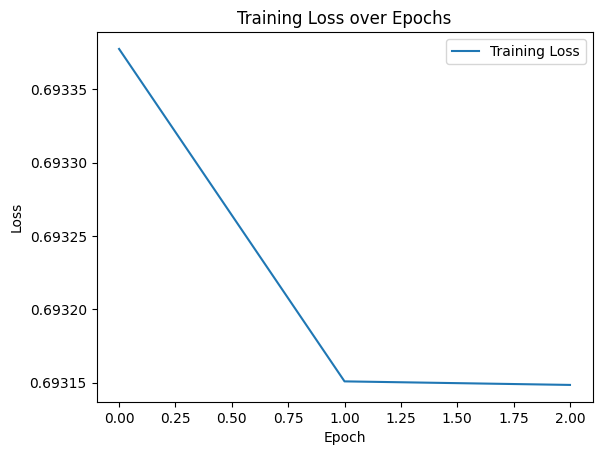

In [20]:
import torch
from torch.utils.data import random_split, DataLoader, TensorDataset
import pandas as pd
from transformers import AutoTokenizer, BertModel, BertConfig, AdamW
import torch.nn as nn
import matplotlib.pyplot as plt

# Load the data
sm_mcq_df = pd.read_csv('mc_data.csv')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
mcq_inputs = tokenizer(sm_mcq_df['question'].tolist(), return_tensors='pt', padding=True, truncation=True)

mcq_labels = torch.tensor([1 if label == 'correct' else 0 for label in sm_mcq_df['cop'].tolist()])

mcq_dataset = TensorDataset(mcq_inputs['input_ids'], mcq_inputs['attention_mask'], mcq_labels)

dataset_size = len(mcq_dataset)
val_size = int(dataset_size * 0.2)
train_size = dataset_size - val_size

mcq_train_dataset, mcq_val_dataset = random_split(mcq_dataset, [train_size, val_size])

batch_size = 8
mcq_train_dataloader = DataLoader(mcq_train_dataset, batch_size=batch_size, shuffle=True)
mcq_val_dataloader = DataLoader(mcq_val_dataset, batch_size=batch_size, shuffle=False)

# Function to inspect DataLoader
def inspect_dataloader(dataloader, name):
    print(f"\n{name} DataLoader Inspection:")
    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        print(f"Input IDs size: {input_ids.size()}")
        print(f"Attention Mask size: {attention_mask.size()}")
        print(f"Labels size: {labels.size()}")
        break

# Inspect the DataLoaders
inspect_dataloader(mcq_train_dataloader, "Training")
inspect_dataloader(mcq_val_dataloader, "Validation")

# Custom model definition
class BertCustomHead(nn.Module):
    def __init__(self, config, num_classes, task_type='sequence_classification'):
        super(BertCustomHead, self).__init__()
        self.bert = BertModel(config)
        self.task_type = task_type

        self.heads = nn.ModuleDict({
            'sequence_classification': nn.Linear(config.hidden_size, num_classes),
            'token_classification': nn.Linear(config.hidden_size, num_classes),
            'multiple_choice': nn.Linear(config.hidden_size, 1),
            'summarization': nn.Linear(config.hidden_size, config.vocab_size)
        })

        self.loss_fns = {
            'sequence_classification': nn.CrossEntropyLoss(),
            'token_classification': nn.CrossEntropyLoss(),
            'multiple_choice': nn.BCEWithLogitsLoss(),
            'summarization': nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
        }

        if task_type not in self.heads:
            raise ValueError("Invalid task type. Supported types: 'sequence_classification', 'token_classification', 'multiple_choice', 'summarization'")

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, decoder_input_ids=None):
        if self.task_type == 'summarization':
            outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
            sequence_output = outputs.last_hidden_state
            logits = self.heads['summarization'](sequence_output)
            return logits
        else:
            outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
            pooled_output = outputs.pooler_output
            return self.heads[self.task_type](pooled_output)

# Initialize model
checkpoint = "bert-base-uncased"
config = BertConfig.from_pretrained(checkpoint)
num_classes = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertCustomHead(config, num_classes, task_type='multiple_choice').to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training function
def train(model, train_dataloader, val_dataloader, optimizer, num_epochs, device):
    losses = []  # List to store losses for plotting
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        batch_count = 0
        for batch in train_dataloader:
            print(f"Batch count: {batch_count}")
            batch_count += 1
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # For multiple-choice task, reshape the output to match the shape of labels
            outputs = outputs.squeeze(-1)
            probabilities = torch.sigmoid(outputs)

            # Calculate loss using BCEWithLogitsLoss
            loss = model.loss_fns['multiple_choice'](probabilities, labels.float())

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()  # Accumulate loss for this batch

        losses.append(epoch_loss / len(train_dataloader))  # Calculate average loss for the epoch
        print(f'Epoch {epoch + 1} completed, Average Loss: {epoch_loss / len(train_dataloader)}')

    return losses

# Training
losses = train(model, mcq_train_dataloader, mcq_val_dataloader, optimizer, num_epochs=3, device=device)

# Plotting losses
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.savefig('training_loss.png')


<p><span style="font-size: 24pt;">&nbsp;Save the model</span><br /><br /></p>

In [21]:
import json
import os

save_directory = "/home/jovyan/pub/saved_model"
os.makedirs(save_directory, exist_ok=True)


base_model_to_save = model.base_model if hasattr(model, 'base_model') else model
if hasattr(base_model_to_save, 'save_pretrained'):
    base_model_to_save.save_pretrained(save_directory)
else:
    torch.save(base_model_to_save.state_dict(), os.path.join(save_directory, 'pytorch_model.bin'))

tokenizer.save_pretrained(save_directory)

model_config_dict = model.bert.config.to_dict()

model_config_dict.update({
    "architectures": ["BertCustomHead"],
    "num_labels": 2,  
    "task_specific_params": {
        "sequence_classification": {
            "num_classes": 2  
        },
        "token_classification": {
            "num_classes": 2  
        },
        "multiple_choice": {
            "num_classes": 4  
        },
        "summarization": {
            "vocab_size": model_config_dict["vocab_size"]  
        }
    }
})

save_directory = "/home/jovyan/pub/saved_model"


os.makedirs(save_directory, exist_ok=True)


config_path = os.path.join(save_directory, 'config.json')


with open(config_path, 'w') as f:
    json.dump(model_config_dict, f, indent=2)

print(f"Configuration saved to {config_path}")

Configuration saved to /home/jovyan/pub/saved_model/config.json
